# NN Projection vs Resolution

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py
import matplotlib.pyplot as plt
import unyt as u

import richio
richio.plots.use_nice_style()

Box sizes

In [2]:
beta = 1
mstar = .5 * richio.units.mscale
rstar = .47 * richio.units.lscale
mbh = 10**4 * richio.units.mscale
rt = rstar * (mbh/mstar)**(1/3)

ra = rt**2 / rstar #2 * Rt * (Mbh/mstar)**(1/3)

nozzle_box = u.unyt_array([-3*rt, -3*rt, -2*ra, 3*rt, 3*rt, 2*ra])
big_box = u.unyt_array([-6*ra, -4*ra, -2*ra, 2.5*ra, 3*ra, 2*ra])
# else_box = u.unyt_array([-3*ra, -2*ra, -0.8*ra, 2*ra, 2*ra, 0.8*ra])

In [3]:
print(ra, rt)

346.29896087219623 code_length 12.757762797996058 code_length


Read data (won't read the data to ram now)

In [4]:
path = '/data1/projects/pi-rossiem/TDE_data/R0.47M0.5BH10000beta1S60n1.5ComptonHiResNewAMR/snap_21'
path = '/data1/projects/pi-rossiem/TDE_data/R0.47M0.5BH10000beta1S60n1.5ComptonHiResNewAMR/snap_76'
path = '/data1/projects/pi-rossiem/TDE_data/R0.47M0.5BH10000beta1S60n1.5ComptonHiResNewAMR/snap_118'

snap = richio.load(path)

## Plot

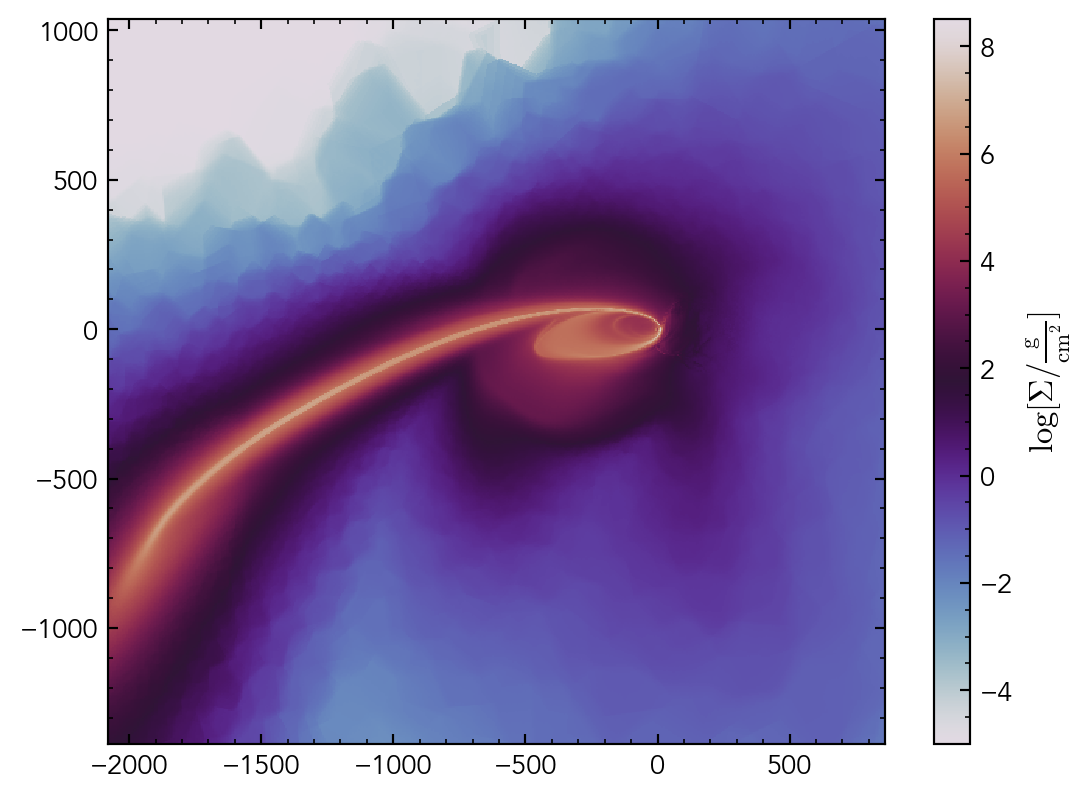

In [5]:
ax, proj_data = snap.plots.projection(data='density', 
                                           x='CMx', 
                                           y='CMy', 
                                           z='CMz', 
                                           res=(500, 500, 100),
                                           box_size=big_box,
                                           vmin=-5, vmax=8.5,
                                           )

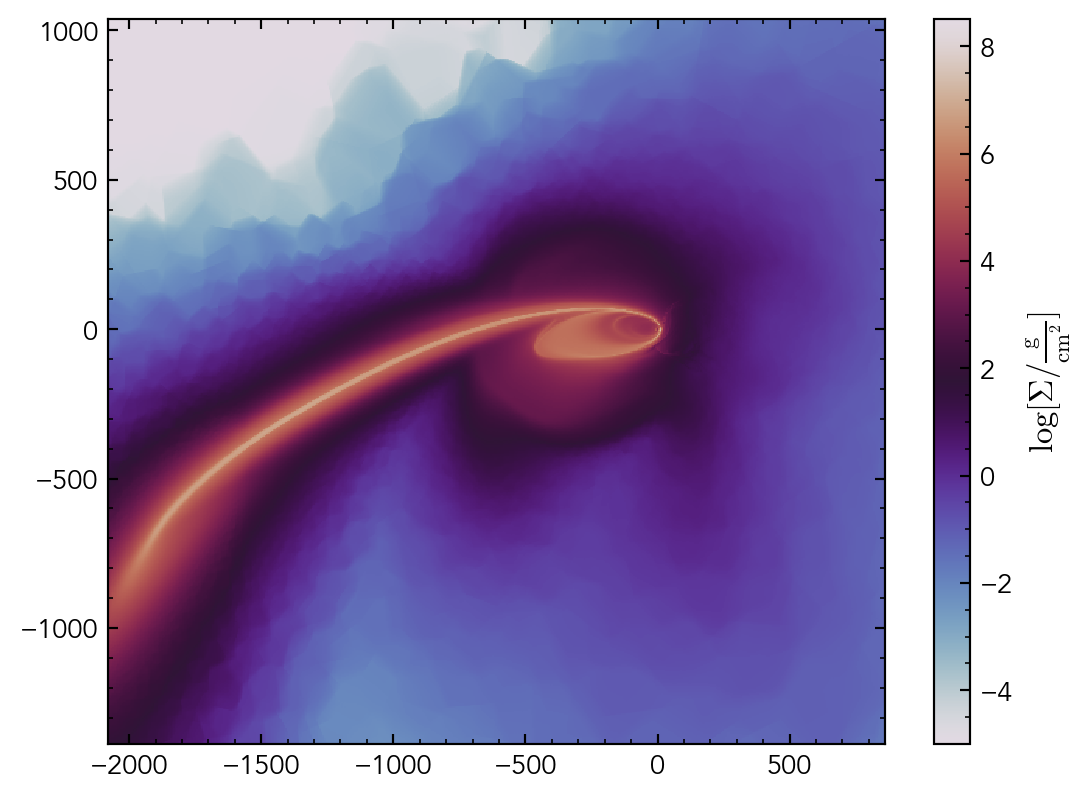

In [6]:
ax, proj_data_2 = snap.plots.projection(data='density', 
                                           x='CMx', 
                                           y='CMy', 
                                           z='CMz', 
                                           res=(500, 500, 500),
                                           box_size=big_box,
                                           vmin=-5, vmax=8.5,
                                           )

### Comparisons

/home/hey4/.conda/envs/richanalysis/lib/python3.13/site-packages/unyt/array.py:1832: RuntimeWarning: divide by zero encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


0.007584719309465582 dimensionless 14.838311597364132 dimensionless 0.0 dimensionless


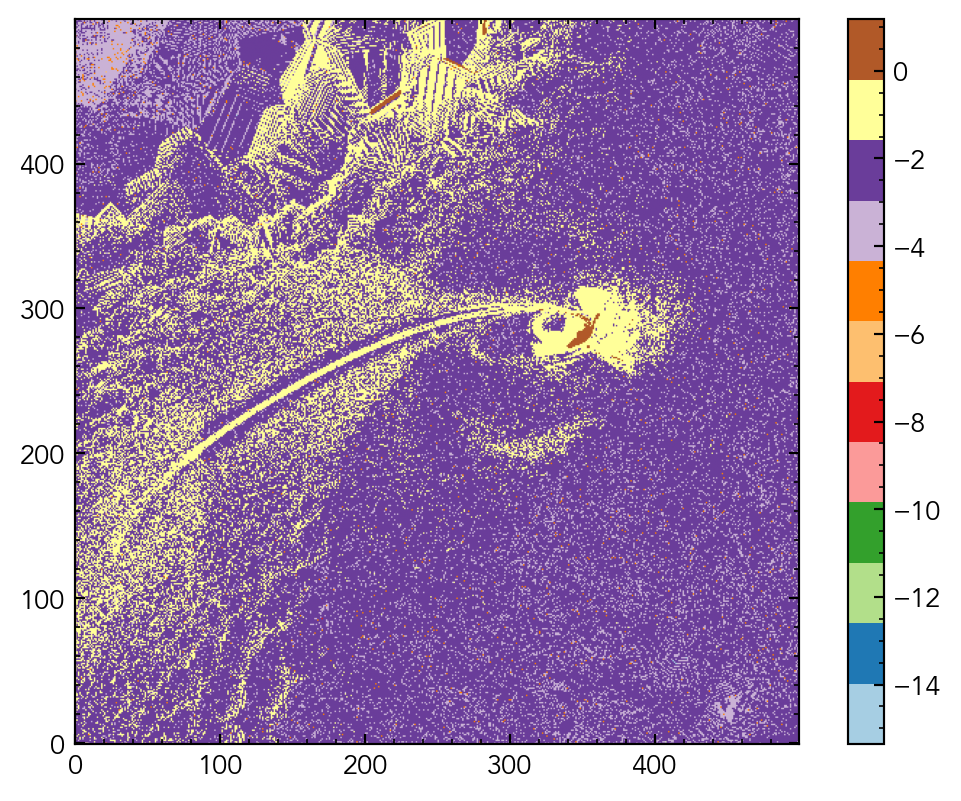

In [8]:
diff1 = np.abs(proj_data_2 / proj_data - 1)
plt.imshow(np.log10(diff1.T), origin='lower', cmap='Paired')
plt.colorbar()
print(np.median(diff1), np.max(diff1), np.min(diff1))